# import modules

In [2]:
from lib.preprocess import load_data
from lib.local_utils import plot_activity
import copy
import numpy as np

# load data

In [3]:
# Same labels will be reused throughout the program
LABELS = ["Downstairs", "Jogging", "Sitting", "Standing", "Upstairs", "Walking"]
# The number of steps within one time segment
TIME_PERIODS = 80
# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments
STEP_DISTANCE = 40
# x, y, z acceleration as features
N_FEATURES = 3
# Define column name of the label vector
LABEL = "ActivityEncoded"
# set random seed
SEED = 314

SAMPLING_RATE = 20

x_train, x_test, y_train, y_test = load_data(
    LABELS, TIME_PERIODS, STEP_DISTANCE, LABEL, N_FEATURES, SEED
)

In [ ]:
idx = 0

In [4]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print(x_train.shape[idx], "training samples")
print(x_test.shape[idx], "testing samples")

x_train shape: (19217, 80, 3) y_train shape: (19217, 6)
19217 training samples
8237 testing samples


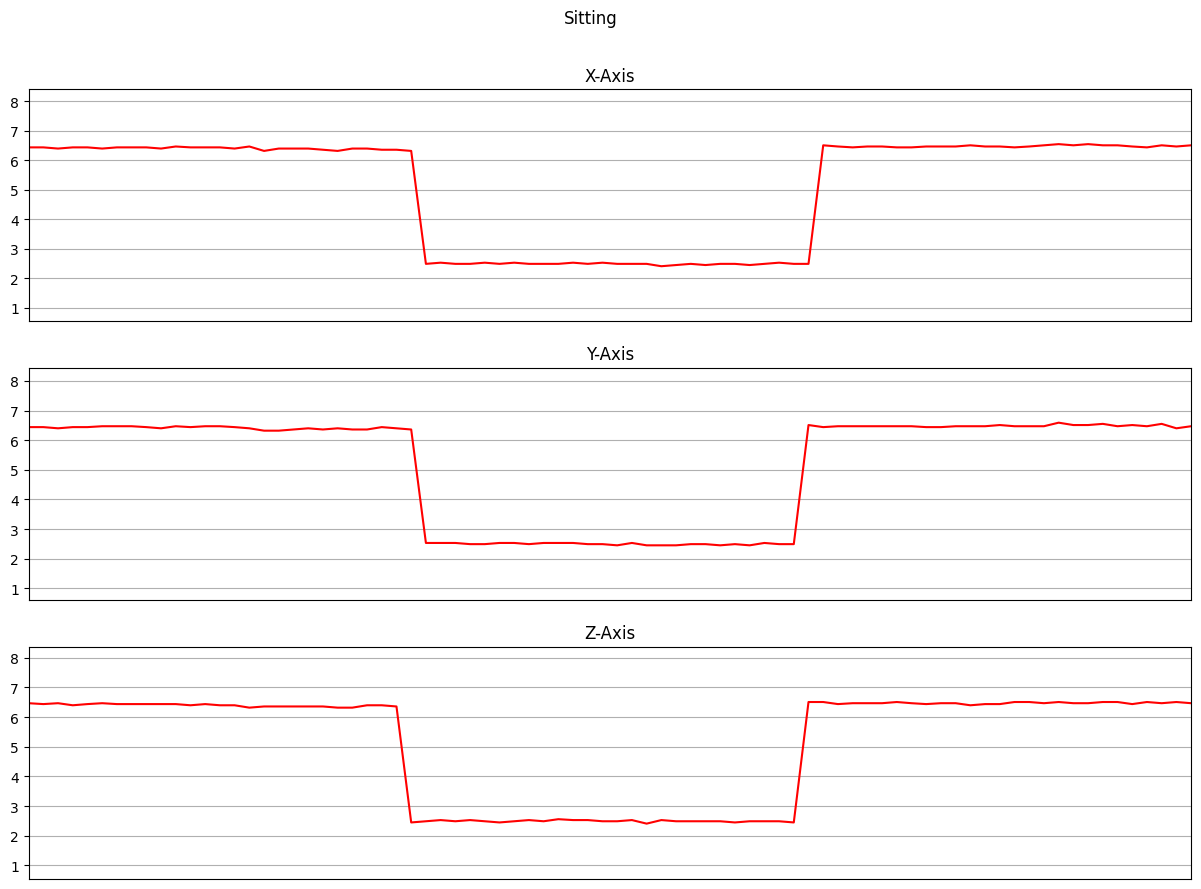

In [5]:
plot_activity(LABELS[np.argmax(y_train[idx])], x_train[idx])

# define functions

In [12]:
def absoulte(data):
    inputs = copy.deepcopy(data)
    outputs = copy.deepcopy(data)
    for i in range(len(inputs)):
        outputs[i] = np.sqrt(np.sum(np.square(inputs[i])))
    return outputs

def low_pass_filter(data, alpha=0.01):
    inputs = copy.deepcopy(data)
    outputs = copy.deepcopy(data)
    for i in range(1, len(inputs)):
        outputs[i] = outputs[i-1] + alpha * (inputs[i] - outputs[i-1])
    return outputs

def differential(data):
    inputs = copy.deepcopy(data)
    outputs = copy.deepcopy(data)
    for i in range(1, len(inputs)):
        outputs[i] = inputs[i] - inputs[i-1]
    return outputs

def integral(data):
    inputs = copy.deepcopy(data)
    outputs = copy.deepcopy(data)
    for i in range(1, len(inputs)):
        outputs[i] = outputs[i-1] + inputs[i]
    return outputs

# absolute

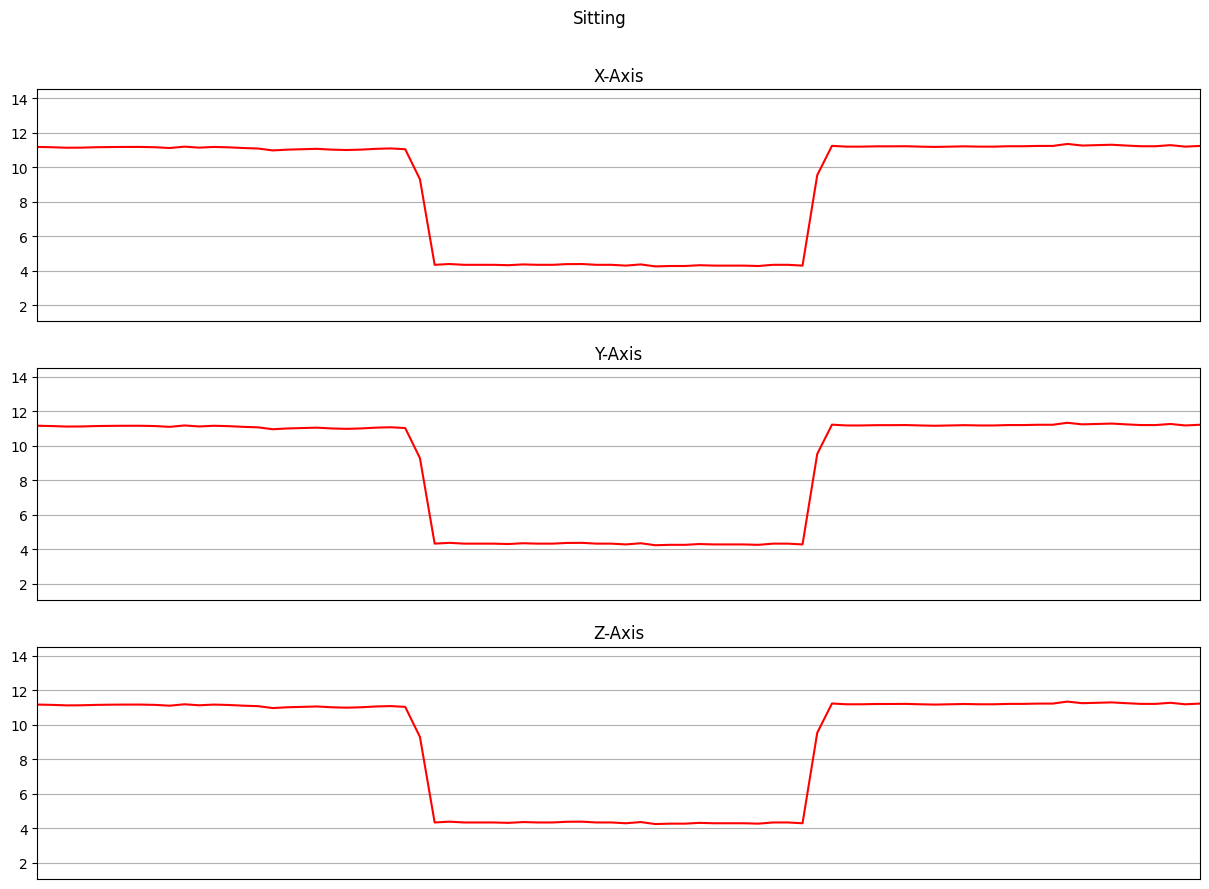

In [15]:
plot_activity(LABELS[np.argmax(y_train[idx])], absoulte(x_train[idx]))

# differential

/tmp/ipykernel_33810/4080064098.py:16: RuntimeWarning: overflow encountered in divide
  inputs[i] = (inputs[i] - inputs[i-1]) / (1/SAMPLING_RATE)


/home/nakagawaren/.local/lib/python3.10/site-packages/numpy/core/_methods.py:213: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)


ValueError: Axis limits cannot be NaN or Inf

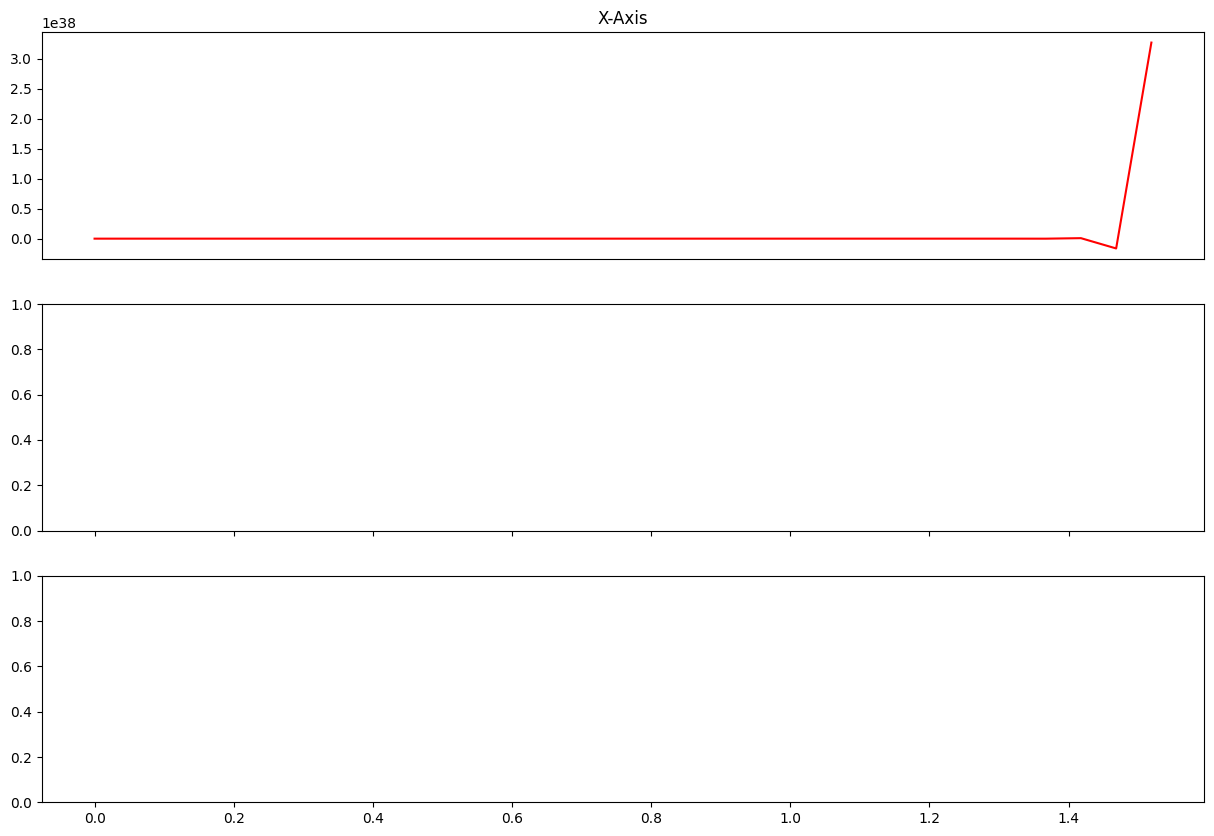

In [8]:
plot_activity(LABELS[np.argmax(y_train[idx])], differential(x_train[idx]))

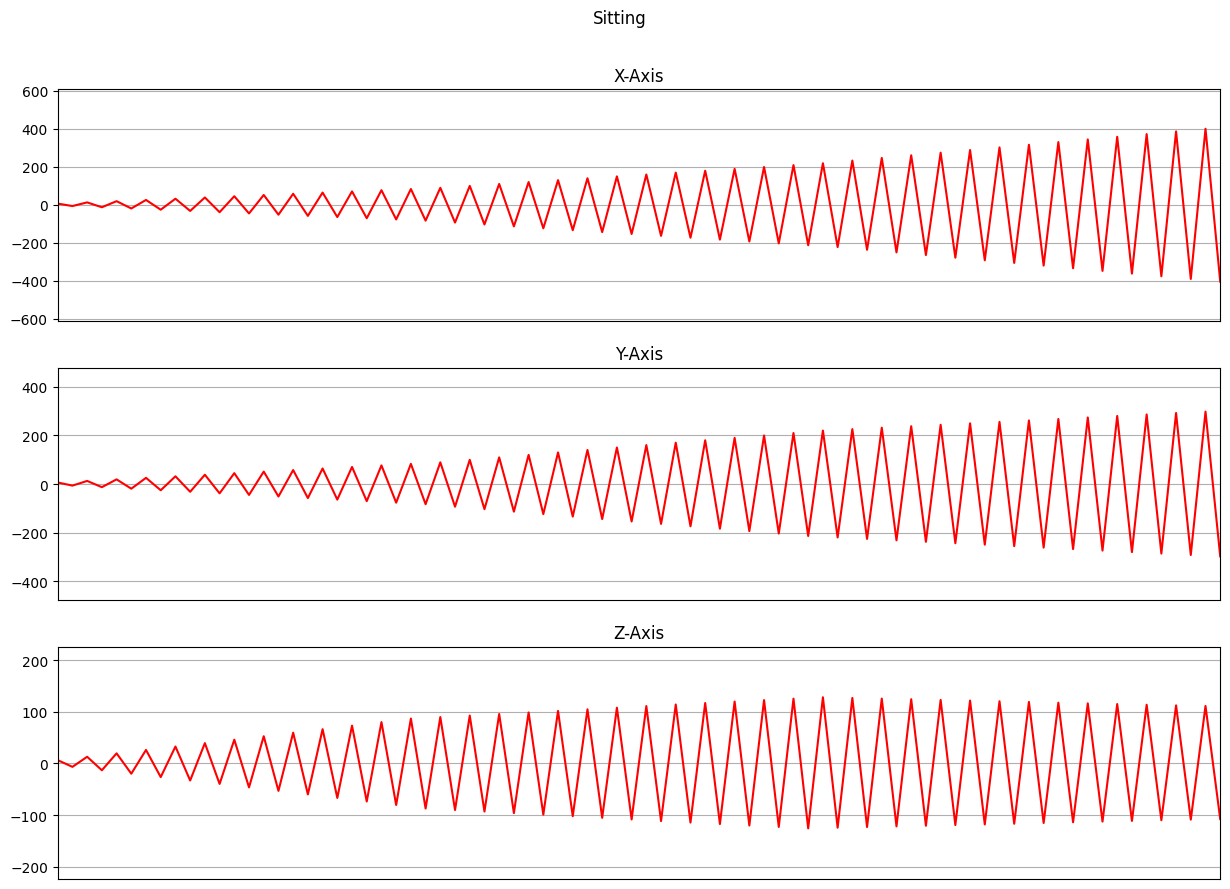

In [ ]:
plot_activity(LABELS[np.argmax(y_train[idx])], differential(differential(x_train[idx])))

# low-pass filtered differential

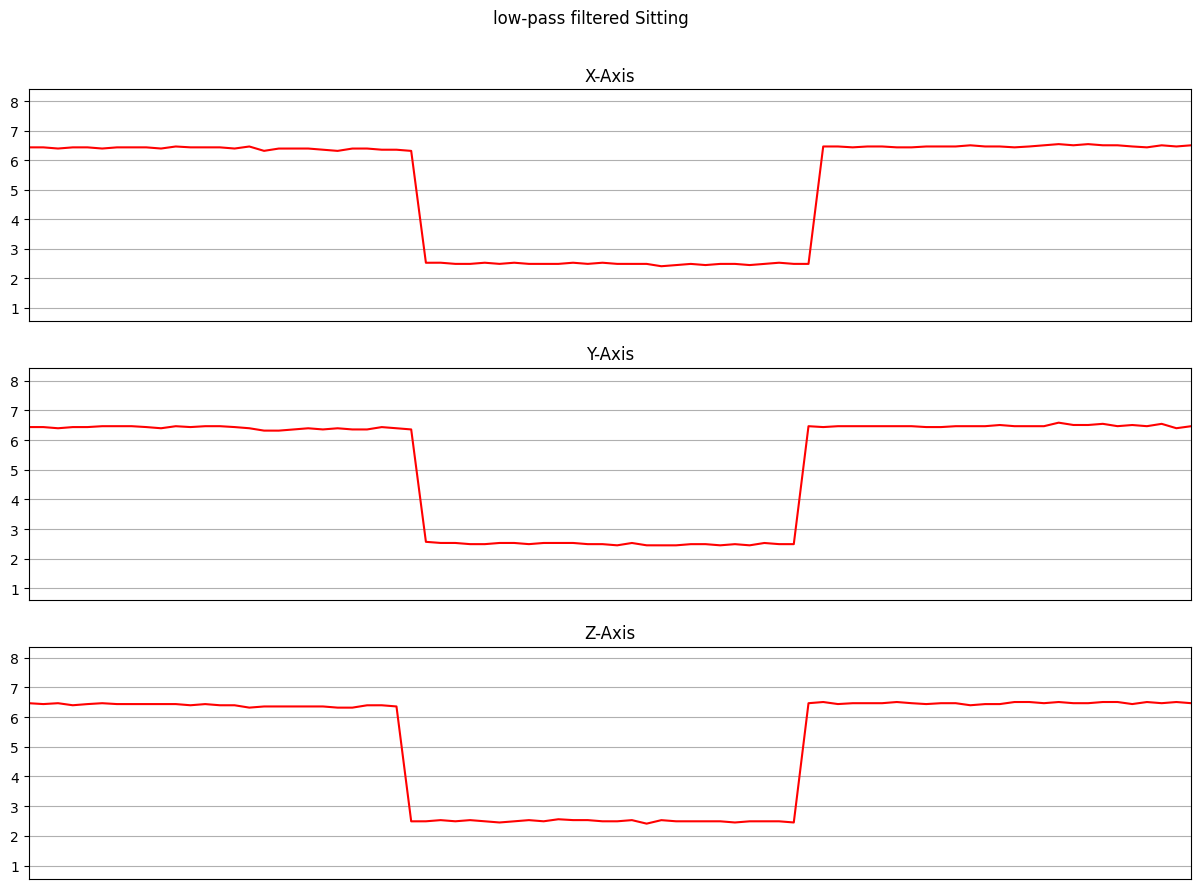

In [ ]:
plot_activity(f"low-pass filtered {LABELS[np.argmax(y_train[idx])]}", low_pass_filter(x_train[idx]))

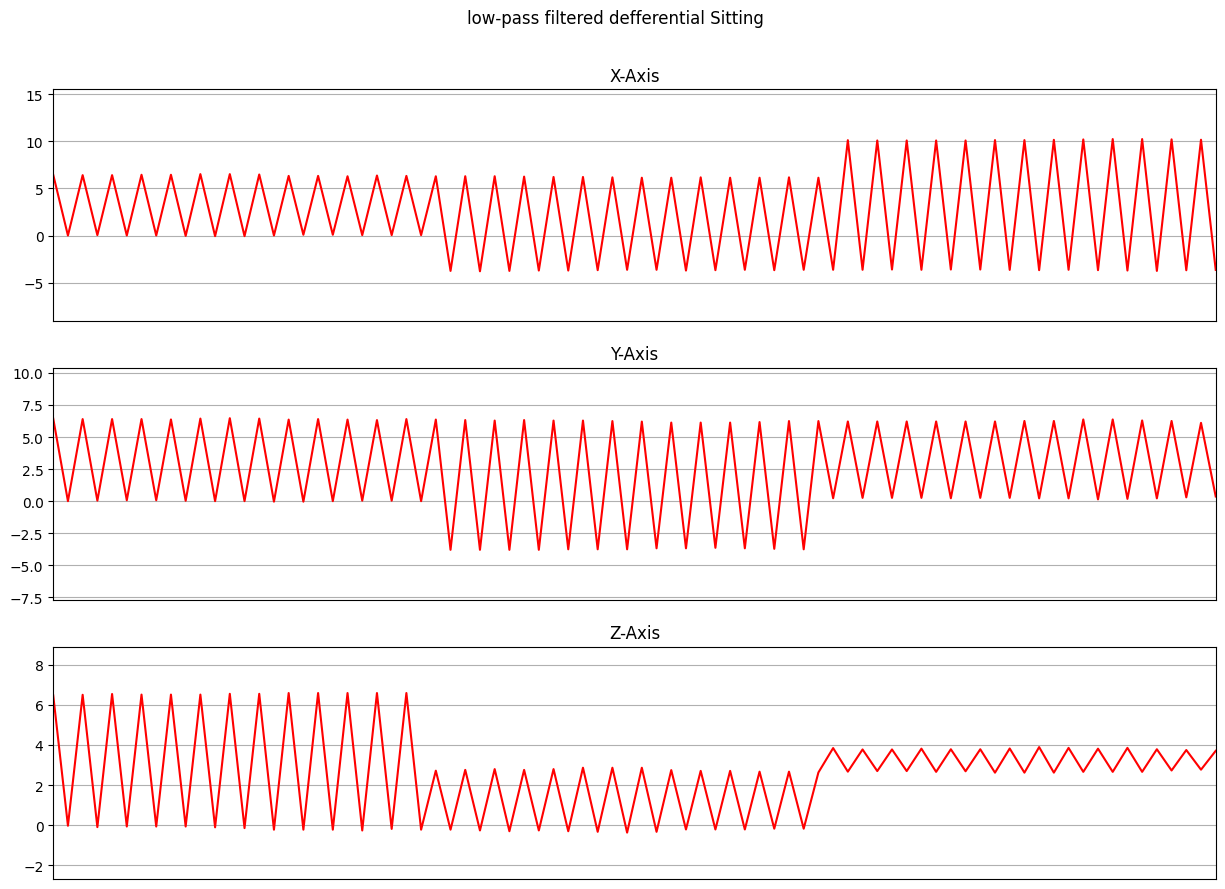

In [ ]:
plot_activity(f"low-pass filtered defferential {LABELS[np.argmax(y_train[idx])]}", differential(low_pass_filter(x_train[idx])))

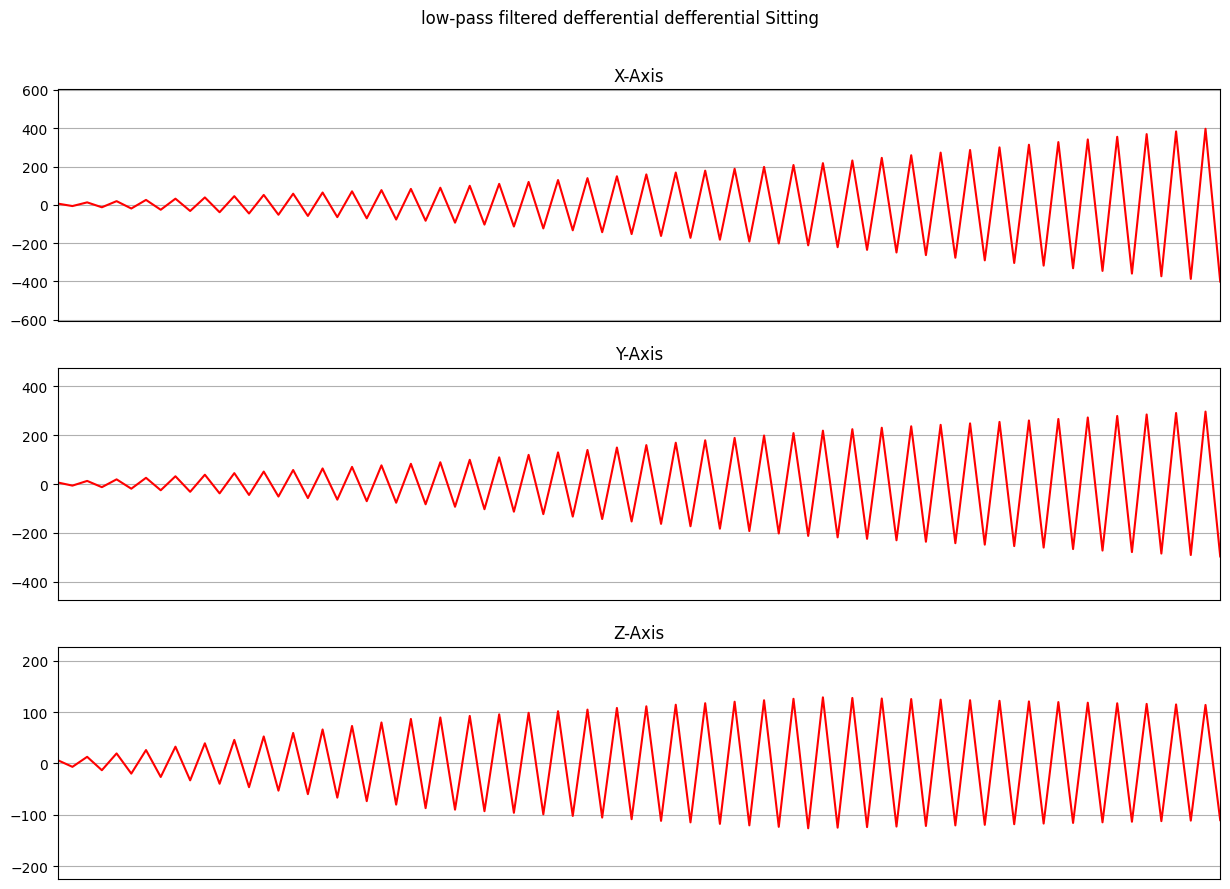

In [ ]:
plot_activity(f"low-pass filtered defferential defferential {LABELS[np.argmax(y_train[idx])]}", differential(differential(low_pass_filter(x_train[idx]))))

# integral

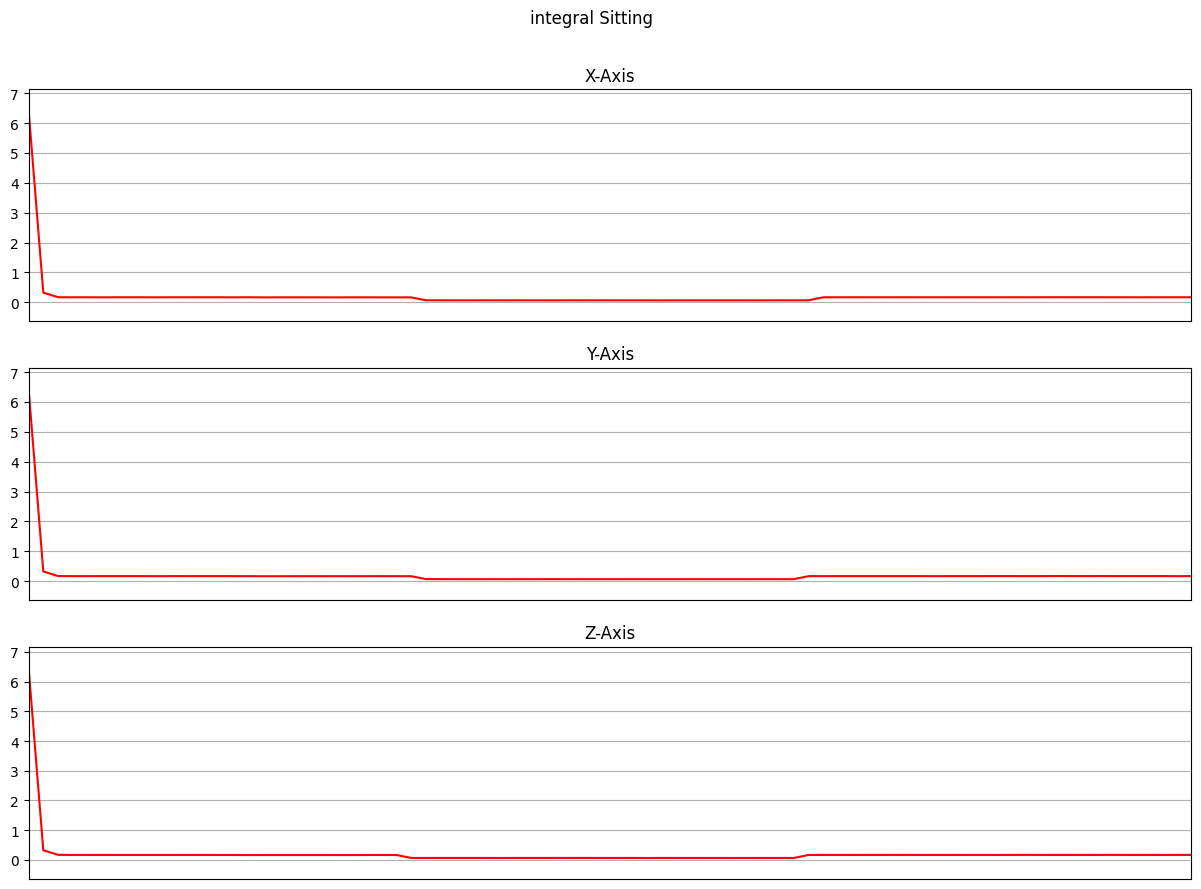

In [ ]:
plot_activity(f"integral {LABELS[np.argmax(y_train[idx])]}", integral(x_train[idx]))

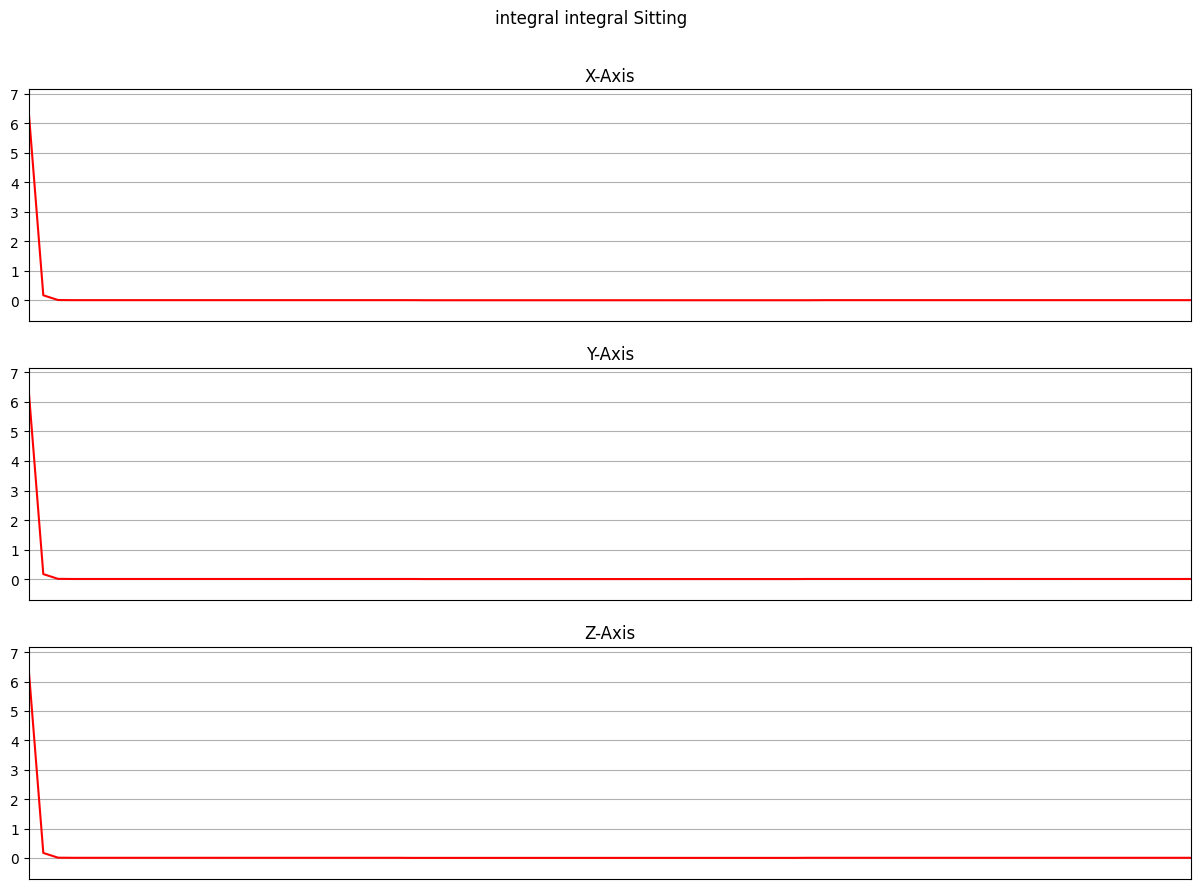

In [ ]:
plot_activity(f"integral integral {LABELS[np.argmax(y_train[idx])]}", integral(integral(x_train[idx])))